In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = '20250108_NH3'
file = os.listdir(path)
# file.pop(0)

# find a file where an intensity peak appears
max_val = []
for i in range(len(file)):
    df_temp = pd.read_csv(path+'/'+file[i], index_col='Time')
    max_val.append(df_temp.max(axis=1).max())
pd.Series(max_val)

0      147.0
1      147.0
2      144.0
3      149.0
4      158.0
       ...  
62    5051.0
63     147.0
64     156.0
65     367.0
66     156.0
Length: 67, dtype: float64

In [4]:
pd.Series(max_val).to_csv('file/process3/process3_max.csv')

In [5]:
df5 = pd.read_csv(path+'/'+file[5], index_col='Time')
df6 = pd.read_csv(path+'/'+file[6], index_col='Time')
df7 = pd.read_csv(path+'/'+file[7], index_col='Time')
print(df5.shape, df6.shape)
df5.head()

(123, 2048) (123, 2048)


,49.750000,50.250000,50.750000,51.250000,51.760000,52.260000,52.760000,53.260000,53.760000,54.260000,...,1186.380000,1186.990000,1187.590000,1188.200000,1188.810000,1189.410000,1190.020000,1190.630000,1191.240000,1191.840000
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-40.0,-33.0,3.0,-7.0,12.0,38.0,-5.0,13.0,4.0,-29.0,...,-23.0,-5.0,-24.0,3.0,-6.0,41.0,-14.0,-35.0,-21.0,-15.0
0.5,-31.0,-25.0,15.0,5.0,11.0,29.0,-12.0,13.0,-2.0,-26.0,...,-18.0,-2.0,-18.0,11.0,-2.0,55.0,-4.0,-31.0,-20.0,-2.0
1.1,-36.0,-25.0,7.0,10.0,12.0,37.0,-7.0,5.0,-3.0,-21.0,...,-18.0,12.0,-29.0,9.0,5.0,45.0,0.0,-44.0,-23.0,-3.0
1.6,-36.0,-23.0,21.0,8.0,16.0,43.0,-8.0,-2.0,-4.0,-34.0,...,-16.0,5.0,-27.0,-1.0,1.0,63.0,-5.0,-32.0,-21.0,0.0
2.1,-33.0,-17.0,4.0,0.0,18.0,35.0,6.0,5.0,9.0,-18.0,...,-14.0,12.0,-15.0,-3.0,-18.0,61.0,-11.0,-18.0,-25.0,-5.0


In [6]:
def DropFromSecond(x):
    x = x * 100
    x = np.floor(x)
    return x/100

df5_new_cols = [str(DropFromSecond(x)) for x in df5.columns.astype(float)]
df5.columns = df5_new_cols
df6.columns = df5_new_cols
df7.columns = df5_new_cols

# concatenate the two
df = pd.concat([df5, df6, df7], ignore_index=True)
print(df.shape)

df.index = [0.6*i for i in range(len(df.index))]

df.head()

(369, 2048)


,49.75,50.25,50.75,51.25,51.76,52.26,52.76,53.26,53.76,54.26,...,1186.38,1186.99,1187.58,1188.2,1188.81,1189.41,1190.02,1190.63,1191.24,1191.83
0.0,-40.0,-33.0,3.0,-7.0,12.0,38.0,-5.0,13.0,4.0,-29.0,...,-23.0,-5.0,-24.0,3.0,-6.0,41.0,-14.0,-35.0,-21.0,-15.0
0.6,-31.0,-25.0,15.0,5.0,11.0,29.0,-12.0,13.0,-2.0,-26.0,...,-18.0,-2.0,-18.0,11.0,-2.0,55.0,-4.0,-31.0,-20.0,-2.0
1.2,-36.0,-25.0,7.0,10.0,12.0,37.0,-7.0,5.0,-3.0,-21.0,...,-18.0,12.0,-29.0,9.0,5.0,45.0,0.0,-44.0,-23.0,-3.0
1.8,-36.0,-23.0,21.0,8.0,16.0,43.0,-8.0,-2.0,-4.0,-34.0,...,-16.0,5.0,-27.0,-1.0,1.0,63.0,-5.0,-32.0,-21.0,0.0
2.4,-33.0,-17.0,4.0,0.0,18.0,35.0,6.0,5.0,9.0,-18.0,...,-14.0,12.0,-15.0,-3.0,-18.0,61.0,-11.0,-18.0,-25.0,-5.0


In [7]:
x = range(len(df.index))
y = range(len(df.columns))

# replace negative values with zero
for i in range(len(df.index)):
    for j in y:
        if df.iloc[i,j]<=1:
            df.iloc[i,j]=0
        else:
            df.iloc[i,j] = np.log(df.iloc[i,j])

# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(df.columns).reshape(-1, 1))
y = mm.transform(np.array(df.columns).reshape(-1, 1)).flatten() * 1142 + 50

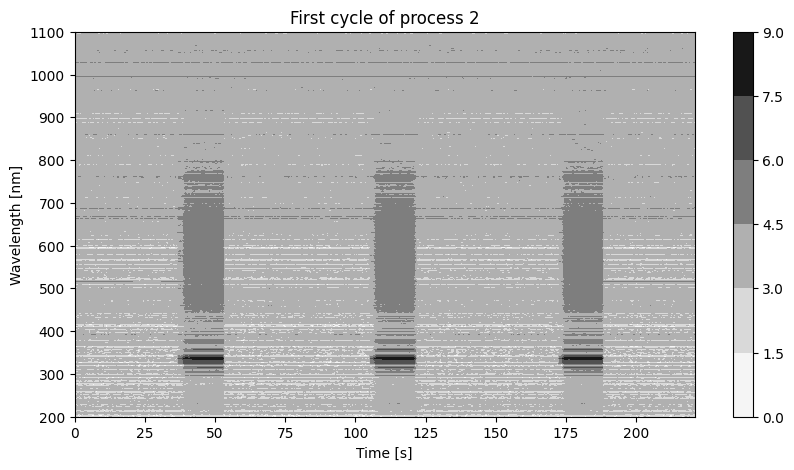

In [8]:
X, Y = np.meshgrid([0.6*i for i in range(len(df.index))], y)
Z = df.T

plt.figure(figsize=(10,5))
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('Time [s]')
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('First cycle of process 2')
plt.colorbar()
plt.show()

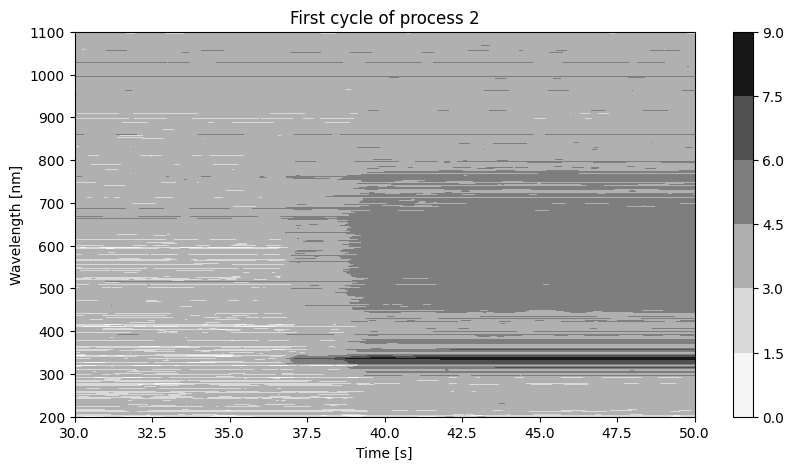

In [9]:
plt.figure(figsize=(10,5))
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(30,50)
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('First cycle of process 2')
plt.colorbar()
plt.show()

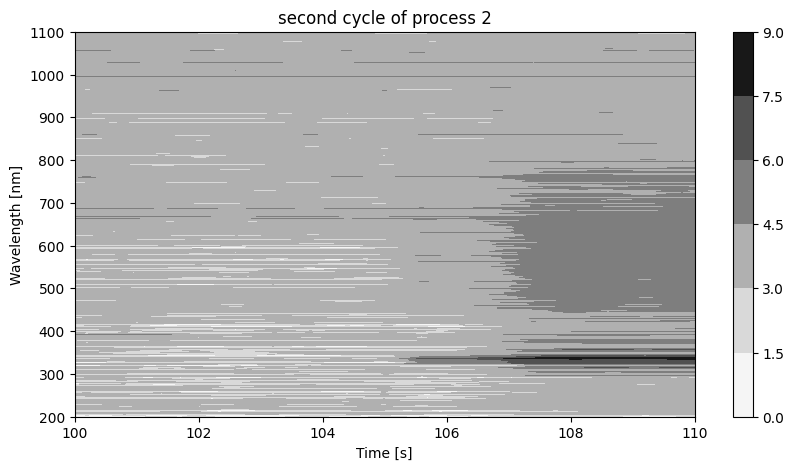

In [10]:
plt.figure(figsize=(10,5))
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('Time [s]')
plt.xlim(100,110)
plt.ylabel('Wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('second cycle of process 2')
plt.colorbar()
plt.show()